# Assignment 4

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [39]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

---
### Step 1: Data ingestion

You'll train a binary classifier using the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This consists of 70,000 grayscale images (28x28). Each image is associated with 1 of 10 classes. The dataset was split by the creators; there are 60,000 training images and 10,000 test images. Note also that Tensorflow includes a growing [library of datasets](https://www.tensorflow.org/datasets/catalog/overview) and makes it easy to load them in numpy arrays.

In [41]:
# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

---
### Step 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) and Data Preprocessing are often iterative processes that involve going back and forth to refine and improve the quality of data analysis and preparation. However, the specific order can vary depending on the project's requirements. In some cases, starting with EDA, as you see in this assignment, could be more useful, but there is no rigid rule dictating the sequence in all situations.

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following tasks:

1. Print the shapes and types of (X_train, Y_train) and (X_test, Y_test). Interpret the shapes (i.e., what do the numbers represent?). Hint: For types use the <span style="color:chocolate">type()</span> function.
2. Define a list of strings of class names corresponding to each class in (Y_train, Y_test). Call this list label_names. Hint: Refer to the Fashion MNIST documentation.

In [42]:
# YOUR CODE HERE
# Task 1: Print shapes and types of the data
print(f"X_train shape: {X_train.shape}, X_train type: {type(X_train)}")
print(f"Y_train shape: {Y_train.shape}, Y_train type: {type(Y_train)}")
print(f"X_test shape: {X_test.shape}, X_test type: {type(X_test)}")
print(f"Y_test shape: {Y_test.shape}, Y_test type: {type(Y_test)}")

# Task 2: Define class names
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Class names: {label_names}")

X_train shape: (60000, 28, 28), X_train type: <class 'numpy.ndarray'>
Y_train shape: (60000,), Y_train type: <class 'numpy.ndarray'>
X_test shape: (10000, 28, 28), X_test type: <class 'numpy.ndarray'>
Y_test shape: (10000,), Y_test type: <class 'numpy.ndarray'>
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Interpret the shapes:
1. X_train.shape[0] and X_test.shape[0] represent the number of examples.
2. X_train.shape[1] and X_train.shape[2] represent the dimensions of each image (28x28 pixels).
3. Y_train and Y_test are 1D arrays with labels for each image.

### <span style="color:chocolate">Exercise 2:</span> Getting to know your data - cont'd (5 points)

Fashion MNIST images have one of 10 possible labels (shown above). 

Complete the following tasks:

1. Display the first 5 images in X_train for each class in Y_train, arranged in a 10x5 grid. Use the label_names list defined above;
2. Determine the minimum and maximum pixel values for images in the X_train dataset.

In [43]:
# YOUR CODE HERE
# Task 1: Iterate over each class and print the first 5 image pixel values for that class
for label_index, label_name in enumerate(label_names):
    print(f"\nClass: {label_name} (Label {label_index})")
    
    # Find the indices of images belonging to the current class
    class_indices = np.where(Y_train == label_index)[0]
    
    # Display pixel values for the first 5 images
    for i in range(5):
        img_index = class_indices[i]
        print(f"\nImage {i+1} pixel values (28x28) for {label_name} (Label {label_index}):")
        print(X_train[img_index])  # Prints the pixel values of the image

# Task 2: Determine the minimum and maximum pixel values
min_pixel_value = np.min(X_train)
max_pixel_value = np.max(X_train)

print(f"\nMinimum pixel value in X_train: {min_pixel_value}")
print(f"Maximum pixel value in X_train: {max_pixel_value}")


Class: T-shirt/top (Label 0)

Image 1 pixel values (28x28) for T-shirt/top (Label 0):
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 21

---
### Step 3: Data preprocessing

This step is essential for preparing this image data in a format that is suitable for ML algorithms. 

### <span style="color:chocolate">Exercise 3:</span> Feature preprocessing (5 points)

In the previous lab, the input data had just a few features. Here, we treat **every pixel value as a separate feature**, so each input example has 28x28 (784) features!

In this exercise, you'll perform the following tasks:

1. Normalize the pixel values in both X_train and X_test data so they range between 0 and 1;
2. For each image in X_train and X_test, flatten the 2-D 28x28 pixel array to a 1-D array of size 784. Hint: use the <span style="color:chocolate">reshape()</span> method available in NumPy. Note that by doing so you will overwrite the original arrays;
3. Pint the shape of X_train and X_test arrays.

In [44]:
# YOUR CODE HERE
# Task 1: Normalize the pixel values to range between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Task 2: Flatten the 28x28 pixel arrays to 1-D arrays of size 784
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

# Task 3: Print the shape of X_train and X_test after flattening
print(f"Shape of X_train after flattening: {X_train.shape}")
print(f"Shape of X_test after flattening: {X_test.shape}")

Shape of X_train after flattening: (60000, 784)
Shape of X_test after flattening: (10000, 784)


### <span style="color:chocolate">Exercise 4:</span> Label preprocessing (5 points)

This assignment involves binary classification. Specifically, the objective is to predict whether an image belongs to the sneaker class (class 7) or not.

Therefore, write code so that for each example in (Y_train, Y_test), the outcome variable is represented as follows: 
* $y=1$, for sneaker class (positive examples), and
* $y=0$, for non-sneaker class (negative examples).

Note: To avoid "ValueError: assignment destination is read-only", first create a copy of the (Y_train, Y_test) data and call the resulting arrays (Y_train, Y_test). Then overwrite the (Y_train, Y_test) arrays to create binary outcomes.

In [45]:
# Make copies of the original dataset for binary classification task.
Y_train = np.copy(Y_train)
Y_test = np.copy(Y_test)

# YOUR CODE HERE
# Convert Y_train and Y_test to binary classification
Y_train = np.where(Y_train == 7, 1, 0)
Y_test = np.where(Y_test == 7, 1, 0)

# Checking the new Y_train and Y_test values
print(f"Unique values in Y_train after conversion: {np.unique(Y_train)}")
print(f"Unique values in Y_test after conversion: {np.unique(Y_test)}")

Unique values in Y_train after conversion: [0 1]
Unique values in Y_test after conversion: [0 1]


### <span style="color:chocolate">Exercise 5:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Retain 20% from the training data for validation purposes. Set random state to 1234. All the other arguments of the method are set to default values. Name the resulting dataframes as follows: X_train_mini, X_val, Y_train_mini, Y_val.
2. Print the shape of each array.

In [46]:
# YOUR CODE HERE
# Task 1: Split the training data (80% training, 20% validation)
X_train_mini, X_val, Y_train_mini, Y_val = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=1234)

# Task 2: Print the shapes of the resulting arrays
print(f"Shape of X_train_mini: {X_train_mini.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of Y_train_mini: {Y_train_mini.shape}")
print(f"Shape of Y_val: {Y_val.shape}")

Shape of X_train_mini: (48000, 784)
Shape of X_val: (12000, 784)
Shape of Y_train_mini: (48000,)
Shape of Y_val: (12000,)


### <span style="color:chocolate">Exercise 6:</span> Data shuffling (10 points)

Since you'll be using Batch Gradient Descent (BGD) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative. 

1. Use [integer array indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html#integer-array-indexing) to re-order (X_train_mini, Y_train_mini) using a list of shuffled indices. In doing so, you will overwrite the arrays.

In [47]:
np.random.seed(0)
# YOUR CODE HERE
# Step 1: Generate shuffled indices
shuffled_indices = np.random.permutation(X_train_mini.shape[0])

# Step 2: Re-order X_train_mini and Y_train_mini using the shuffled indices
X_train_mini = X_train_mini[shuffled_indices]
Y_train_mini = Y_train_mini[shuffled_indices]

# Verifying the shape of shuffled arrays
print(f"Shape of shuffled X_train_mini: {X_train_mini.shape}")
print(f"Shape of shuffled Y_train_mini: {Y_train_mini.shape}")

Shape of shuffled X_train_mini: (48000, 784)
Shape of shuffled Y_train_mini: (48000,)


---
### Step 4: Exploratory Data Analysis (EDA) - cont'd

Before delving into model training, let's further explore the raw feature values by comparing sneaker and non-sneaker training images.

### <span style="color:chocolate">Exercise 7:</span> Pixel distributions (10 points)

1. Identify all sneaker images in X_train_mini and calculate the mean pixel value for each sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all sneaker images.
2. Identify all non-sneaker images in X_train_mini and calculate the mean pixel value for each non-sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all non-sneaker images.
3. Based on the histogram results, assess whether there is any evidence suggesting that pixel values can be utilized to distinguish between sneaker and non-sneaker images. Justify your response.

Notes: Make sure to provide a descriptive title and axis labels for each histogran. Make sure you utilize Y_train_mini to locate the sneaker and non-sneaker class.

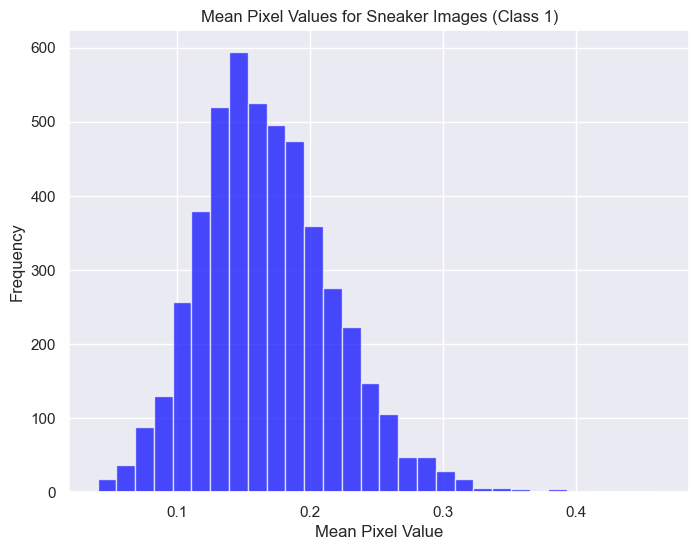

Mean pixel value across all sneaker images: 0.1682747275993731


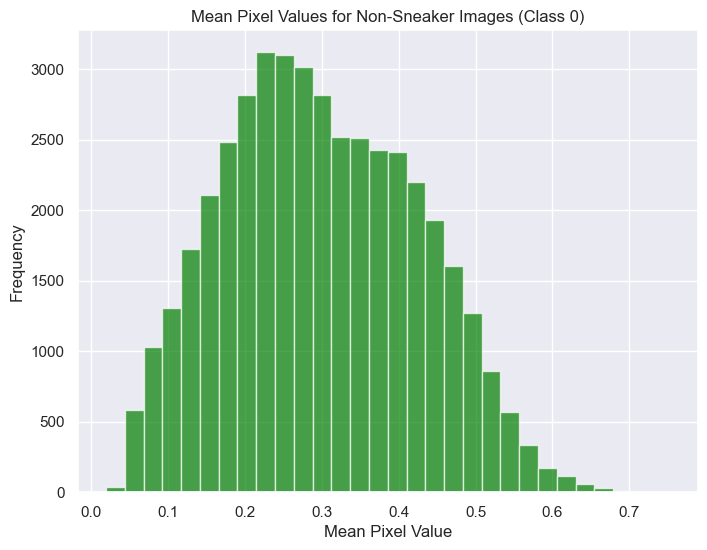

Mean pixel value across all non-sneaker images: 0.2990019268123916


In [94]:
# YOUR CODE HERE
# Task 1: Identify all sneaker images (class 1) and calculate their mean pixel values
sneaker_indices = np.where(Y_train_mini == 1)[0]
sneaker_images = X_train_mini[sneaker_indices]

# Calculate the mean pixel value for each sneaker image
sneaker_mean_pixels = np.mean(sneaker_images, axis=1)

# Plot histogram for sneaker images' mean pixel values
plt.figure(figsize=(8, 6))
plt.hist(sneaker_mean_pixels, bins=30, color='blue', alpha=0.7)
plt.title('Mean Pixel Values for Sneaker Images (Class 1)')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the mean pixel value across all sneaker images
mean_sneaker_pixels = np.mean(sneaker_mean_pixels)
print(f"Mean pixel value across all sneaker images: {mean_sneaker_pixels}")

# Task 2: Identify all non-sneaker images (class 0) and calculate their mean pixel values
non_sneaker_indices = np.where(Y_train_mini == 0)[0]
non_sneaker_images = X_train_mini[non_sneaker_indices]

# Calculate the mean pixel value for each non-sneaker image
non_sneaker_mean_pixels = np.mean(non_sneaker_images, axis=1)

# Plot histogram for non-sneaker images' mean pixel values
plt.figure(figsize=(8, 6))
plt.hist(non_sneaker_mean_pixels, bins=30, color='green', alpha=0.7)
plt.title('Mean Pixel Values for Non-Sneaker Images (Class 0)')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the mean pixel value across all non-sneaker images
mean_non_sneaker_pixels = np.mean(non_sneaker_mean_pixels)
print(f"Mean pixel value across all non-sneaker images: {mean_non_sneaker_pixels}")

Answer: The distribution of mean pixel values for sneaker images is more concentrated toward the lower end, while non-sneaker images are spread out with a higher concentration of brighter values. This suggests that, in terms of overall brightness, the two classes are somewhat distinguishable.

---
### Step 4: Modeling

### <span style="color:chocolate">Exercise 8:</span> Baseline model (10 points)

When dealing with classification problems, a simple baseline is to select the *majority* class (the most common label in the training set) and use it as the prediction for all inputs.

With this information in mind:

1. What is the number of sneaker images in Y_train_mini?
2. What is the number of non-sneaker images in Y_train_mini?
3. What is the majority class in Y_train_mini?
4. What is the accuracy of a majority class classifier for Y_train_mini?
5. Implement a function that computes the Log Loss (binary cross-entropy) metric and use it to evaluate this baseline on both the mini train (Y_train_mini) and validation (Y_val) data. Use 0.1 as the predicted probability for your baseline (reflecting what we know about the original distribution of classes in the mini training data). Hint: for additional help, see the file ``04 Logistic Regression with Tensorflow_helpers.ipynb``.

In [73]:
# YOUR CODE HERE
# Task 1: Number of sneaker images in Y_train_mini (class 1)
num_sneakers = np.sum(Y_train_mini == 1)
print(f"Number of sneaker images in Y_train_mini: {num_sneakers}")

# Task 2: Number of non-sneaker images in Y_train_mini (class 0)
num_non_sneakers = np.sum(Y_train_mini == 0)
print(f"Number of non-sneaker images in Y_train_mini: {num_non_sneakers}")

# Task 3: Determine the majority class
majority_class = 1 if num_sneakers > num_non_sneakers else 0
print(f"Majority class in Y_train_mini: {majority_class}")

# Task 4: Accuracy of the majority class classifier
accuracy_majority_class = np.mean(Y_train_mini == majority_class)
print(f"Accuracy of majority class classifier: {accuracy_majority_class:.4f}")

# Task 5: Implement Log Loss (Binary Cross-Entropy)
def log_loss(y_true, y_pred_prob):
    """Compute binary cross-entropy (log loss) given true labels and predicted probabilities."""
    epsilon = 1e-15  # Small constant to avoid log(0)
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)  # Ensure probabilities are between (epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))
    return loss

# Evaluate the baseline with predicted probability of 0.1
y_pred_prob = 0.1  # Baseline probability

# Log Loss on Y_train_mini
log_loss_train = log_loss(Y_train_mini, y_pred_prob)
print(f"Log Loss (binary cross-entropy) on Y_train_mini: {log_loss_train:.4f}")

# Log Loss on Y_val
log_loss_val = log_loss(Y_val, y_pred_prob)
print(f"Log Loss (binary cross-entropy) on Y_val: {log_loss_val:.4f}")

Number of sneaker images in Y_train_mini: 4800
Number of non-sneaker images in Y_train_mini: 43200
Majority class in Y_train_mini: 0
Accuracy of majority class classifier: 0.9000
Log Loss (binary cross-entropy) on Y_train_mini: 0.3251
Log Loss (binary cross-entropy) on Y_val: 0.3251


### <span style="color:chocolate">Exercise 9:</span> Improvement over Baseline with TensorFlow (10 points)

Let's use TensorFlow to train a binary logistic regression model much like you did in the previous assignment. The goal here is to build a ML model to improve over the baseline classifier.

1. Fill in the <span style="color:green">NotImplemented</span> parts of the build_model() function below by following the instructions provided as comments. Hint: the activation function, the loss, and the evaluation metric are different compared to the linear regression model;
2. Build and compile a model using the build_model() function and the (X_train_mini, Y_train_mini) data. Set learning_rate = 0.0001. Call the resulting object *model_tf*.
3. Train *model_tf* using the (X_train_mini, Y_train_mini) data. Set num_epochs = 5 and batch_size=32. Pass the (X_val, Y_val) data for validation. Hint: see the documentation behind the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method.
3. Generate a plot (for the mini training and validation data) with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title. Hint: check what the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method returns.

In [77]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        # output dim
      input_shape=(num_features,),  # input dim
      use_bias=True,               # use a bias (intercept) param
      activation='sigmoid',
      kernel_initializer=tf.keras.initializers.Ones(),  # initialize params to 1
      bias_initializer=tf.keras.initializers.Ones(),    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch GD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
  return model

c:\Users\myk53\hello\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - accuracy: 0.1017 - loss: 208.5961 - val_accuracy: 0.1000 - val_loss: 199.9825
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.1017 - loss: 196.0804 - val_accuracy: 0.1000 - val_loss: 187.4252
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.1017 - loss: 183.5648 - val_accuracy: 0.1000 - val_loss: 174.8680
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.1017 - loss: 171.0492 - val_accuracy: 0.1000 - val_loss: 162.3107
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.1017 - loss: 158.5334 - val_accuracy: 0.1000 - val_loss: 149.7533


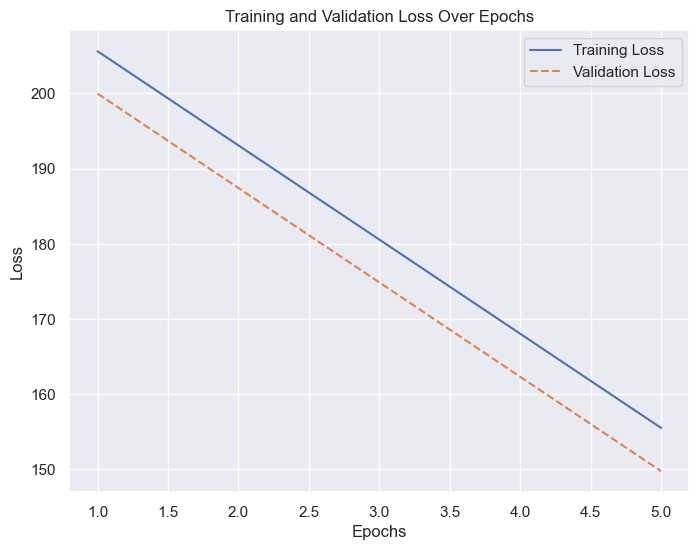

In [78]:
tf.random.set_seed(0)
# 2. Build and compile model
learning_rate = 0.0001
num_features = X_train_mini.shape[1]  # Number of features (784)
model_tf = build_model(num_features, learning_rate)

# 3. Fit the model
num_epochs = 5
batch_size = 32

history = model_tf.fit(X_train_mini, Y_train_mini, epochs=num_epochs, batch_size=batch_size,
                       validation_data=(X_val, Y_val), verbose=1)

# Extracting loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, num_epochs + 1)

# Plot the loss values over epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning is a crucial step in optimizing ML models. It involves systematically adjusting hyperparameters such as learning rate, number of epochs, and optimizer to find the model configuration that leads to the best generalization performance.

This tuning process is typically conducted by monitoring the model's performance on the validation vs. training set. It's important to note that using the test set for hyperparameter tuning can compromise the integrity of the evaluation process by violating the assumption of "blindness" of the test data.

### <span style="color:chocolate">Exercise 10:</span> Hyperparameter tuning (10 points)

1. Fine-tune the **learning rate** and **number of epochs** hyperparameters of *model_tf* to determine the setup that yields the most optimal generalization performance. Feel free to explore various values for these hyperparameters. Hint: you can manually test different hyperparameter values or you can use the [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner). If you decide to work with the Keras Tuner, define a new model building function named <span style="color:chocolate">build_model_tuner()</span>.

After identifying your preferred model configuration, print the following information:

2. The first five learned parameters of the model (this should include the bias term);
3. The loss at the final epoch on both the mini training and validation datasets;
4. The percentage difference between the losses observed on the mini training and validation datasets.
5. Compare the training/validation loss of the TensorFlow model (model_tf) with the baseline model's loss. Does the TensorFlow model demonstrate an improvement over the baseline model?


Please note that we will consider 'optimal model configuration' any last-epoch training and validation loss that is below 0.08.

In [83]:
# YOUR CODE HERE
import keras_tuner as kt
import tensorflow as tf

# Define the model for hyperparameter tuning (with a fixed output of 1 unit for binary classification)
def build_model_tuner(hp):
    model = tf.keras.Sequential()
    
    # Tune the number of units (hidden neurons) in the Dense layer (optional)
    # Let's say we want to tune the units of a hidden layer instead of the output layer
    units = hp.Int('units', min_value=10, max_value=100, step=10)
    
    # Hidden layer
    model.add(tf.keras.layers.Dense(
        units=units,                   # Tunable hidden layer units
        input_shape=(784,),            # Input dimension (flattened image of 784 features)
        activation='relu'              # ReLU for hidden layers
    ))
    
    # Output layer (fixed to 1 unit for binary classification)
    model.add(tf.keras.layers.Dense(
        units=1,                       # Output dimension for binary classification (0 or 1)
        activation='sigmoid',          # Sigmoid activation for binary classification
        kernel_initializer=tf.keras.initializers.Ones(),  # Initialize weights to 1
        bias_initializer=tf.keras.initializers.Ones()     # Initialize bias to 1
    ))
    
    # Tune the learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    # Compile the model
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [84]:
# Initialize the Keras Tuner
tuner = kt.Hyperband(
    build_model_tuner,                # The model-building function
    objective='val_loss',             # Optimize for validation loss
    max_epochs=10,                    # Max number of epochs
    factor=3,                         # Factor for reducing learning rate
    directory='my_dir',               # Where to save logs
    project_name='tune_logistic_regression'  # Project name for Keras Tuner
)

# Search for the best hyperparameters
tuner.search(X_train_mini, Y_train_mini, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.
The optimal number of units in the dense layer is {best_hps.get('units')} and the optimal learning rate is {best_hps.get('learning_rate')}.
""")

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train_mini, Y_train_mini, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Trial 25 Complete [00h 00m 16s]
val_loss: 0.7747875452041626

Best val_loss So Far: 0.06202535331249237
Total elapsed time: 00h 03m 49s

The hyperparameter search is complete.
The optimal number of units in the dense layer is 9 and the optimal learning rate is 0.01.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6179 - loss: 0.6294 - val_accuracy: 0.9622 - val_loss: 0.1699
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.9647 - loss: 0.1495 - val_accuracy: 0.9668 - val_loss: 0.1156
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.9688 - loss: 0.1083 - val_accuracy: 0.9694 - val_loss: 0.0962
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.9715 - loss: 0.0918 - val_accuracy: 0.9721 - val_loss: 0.0857
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.9732 - loss: 0.0824 - val_accuracy: 0.9741 - val_loss: 0.0788
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.9751

In [95]:
# Print the first five learned parameters (including bias)
weights, bias = best_model.layers[0].get_weights()
print(f"First five weights: {weights.flatten()[:5]}")
print(f"Bias term: {bias}")

# Get final training and validation loss
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# Print final losses
print(f"Final Training Loss: {final_train_loss}")
print(f"Final Validation Loss: {final_val_loss}")

# Calculate percentage difference
percentage_diff = 100 * abs(final_val_loss - final_train_loss) / final_train_loss
print(f"Percentage difference between training and validation loss: {percentage_diff:.2f}%")


First five weights: [-0.01932525 -0.01571224 -0.00862775  0.04989257 -0.03682381]
Bias term: [-0.02344253 -0.02817896  0.43009028 -0.03462715 -0.03439248 -0.01923068
 -0.02026355 -0.03582274 -0.02145676]
Final Training Loss: 0.061502229422330856
Final Validation Loss: 0.06224498152732849
Percentage difference between training and validation loss: 1.21%


Answer: The TensorFlow model demonstrates a clear improvement over the baseline model in terms of both loss and likely accuracy 

---
### Step 6: Evaluation and Generalization


Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

### <span style="color:chocolate">Exercise 11:</span> Computing accuracy (10 points)

1. Calculate aggregate accuracy on both mini train and test datasets using a probability threshold of 0.5. Hint: You can utilize the <span style="color:chocolate">model.evaluate()</span> method provided by tf.keras. Note: Aggregate accuracy measures the overall correctness of the model across all classes in the dataset;

2. Does the model demonstrate strong aggregate generalization capabilities? Provide an explanation based on your accuracy observations.

In [86]:
# YOUR CODE HERE
# Evaluate the model on the mini training set
train_loss, train_accuracy = best_model.evaluate(X_train_mini, Y_train_mini, verbose=0)
print(f"Mini Training Loss: {train_loss}")
print(f"Mini Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Mini Training Loss: 0.060008060187101364
Mini Training Accuracy: 97.96%
Test Loss: 0.06054362654685974
Test Accuracy: 97.94%


Answer: Since the test accuracy is close to the training accuracy and both are high, the model generalizes well.

### <span style="color:chocolate">Exercise 12:</span> Fairness evaluation (10 points)

1. Generate and visualize the confusion matrix on the test dataset using a probability threshold of 0.5. Additionally, print the True Positives (TP), False Negatives (FN), False Positives (FP), and True Negatives (TN). Hint: you can utilize the <span style="color:chocolate">model.predict()</span> method available in tf.keras, and then the <span style="color:chocolate">confusion_matrix()</span>, <span style="color:chocolate">ConfusionMatrixDisplay()</span> methods available in sklearn.metrics;

2. Compute subgroup accuracy, separately for the sneaker and non-sneaker classes, on the test dataset using a probability threshold of 0.5. Reflect on any observed accuracy differences (potential lack of fairness) between the two classes.

3. Does the model demonstrate strong subgroup generalization capabilities? Provide an explanation based on your accuracy observations.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step


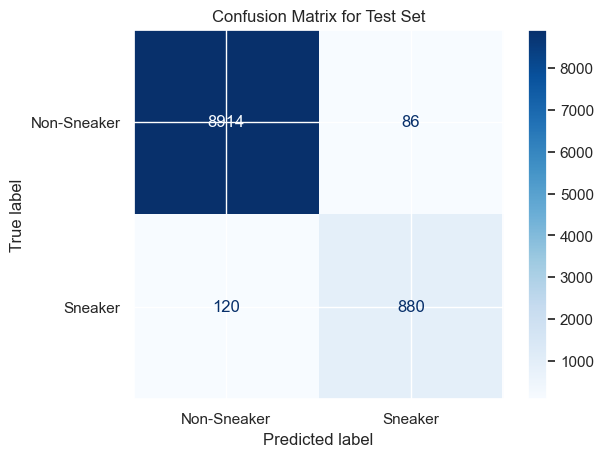

True Positives (TP): 880
False Negatives (FN): 120
False Positives (FP): 86
True Negatives (TN): 8914
Sneaker Class (Class 1) Accuracy: 88.00%
Non-Sneaker Class (Class 0) Accuracy: 99.04%
Difference in accuracy between sneaker and non-sneaker classes: 11.04%


In [92]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Step 1: Get the predicted probabilities for the test set
y_pred_prob = best_model.predict(X_test)

# Step 2: Apply a probability threshold of 0.5 to get binary class labels
y_pred_class = (y_pred_prob >= 0.5).astype(int)

# Step 3: Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred_class)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Sneaker", "Sneaker"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Test Set")
plt.show()

# Step 4: Print TP, FN, FP, TN
tn, fp, fn, tp = cm.ravel()  # Unpack confusion matrix into individual components
print(f"True Positives (TP): {tp}")
print(f"False Negatives (FN): {fn}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")

# Step 5: Compute subgroup accuracy for sneaker (class 1) and non-sneaker (class 0)
# Accuracy for the sneaker class (class 1)
sneaker_indices = (Y_test == 1)
sneaker_accuracy = accuracy_score(Y_test[sneaker_indices], y_pred_class[sneaker_indices])
print(f"Sneaker Class (Class 1) Accuracy: {sneaker_accuracy * 100:.2f}%")

# Accuracy for the non-sneaker class (class 0)
non_sneaker_indices = (Y_test == 0)
non_sneaker_accuracy = accuracy_score(Y_test[non_sneaker_indices], y_pred_class[non_sneaker_indices])
print(f"Non-Sneaker Class (Class 0) Accuracy: {non_sneaker_accuracy * 100:.2f}%")

# Step 6: Reflect on subgroup accuracy differences
accuracy_diff = abs(sneaker_accuracy - non_sneaker_accuracy) * 100
print(f"Difference in accuracy between sneaker and non-sneaker classes: {accuracy_diff:.2f}%")

Answer: The model demonstrates strong generalization for the non-sneaker class (99.04%), but it struggles with the sneaker class (88.00%), showing a notable accuracy gap of 11.04%. This suggests that the model is biased toward the non-sneaker class and does not generalize as well for sneakers.

----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

Is it possible to enhance the prediction accuracy for the sneaker class by performing the following steps?

1. Implement data balancing techniques, such as oversampling or undersampling, to equalize the representation of both classes.
2. After balancing the data, retrain the model on the balanced dataset.
3. Evaluate the model's performance, particularly focusing on the accuracy achieved for the sneaker class.